### Basic Operations on Images ###

In [8]:
# Accessing and Modifying pixel values


import numpy as np
import cv2 as cv

img = cv.imread('img.png')
assert img is not None, "file could not be read, check with os.path.exists()"

px = img[100,100]
print( px )

# accessing only blue pixel
blue = img[100,100,0]
print( blue )


[42 55 63]
42


In [9]:
# accessing RED value
print(img.item(10,10,2))


# modifying RED value
# img.itemset((10,10,2),100)
img[10,10,2] = 100
img.item(10,10,2)

131


100

In [11]:
# Accessing Image Properties

print( img.shape )
print( img.size )
print( img.dtype )


(507, 760, 3)
1155960
uint8


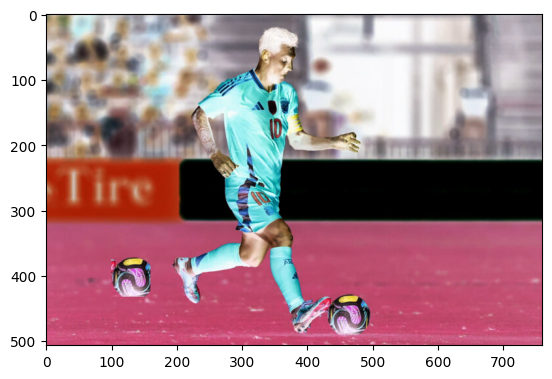

In [25]:
# Image ROI
from matplotlib import pyplot as plt
img = cv.imread('img.png')
img = cv.bitwise_not(img)
x = 150
y = 100
ball = img[280+x:340+x, 330+y:390+y]
img[373:433, 100:160] = ball


# рисуем
plt.imshow(img)
# выводим
plt.show()


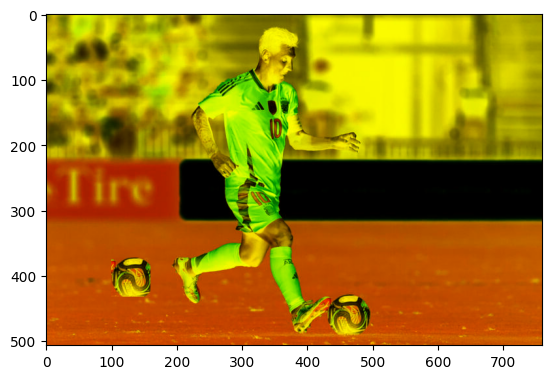

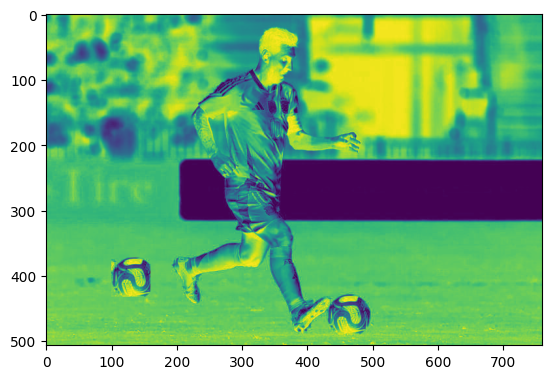

In [28]:
# Splitting and Merging Image Channels
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
b = img[:,:,0]
img[:,:,2] = 0


plt.imshow(img)
# выводим
plt.show()

plt.imshow(b)
# выводим
plt.show()

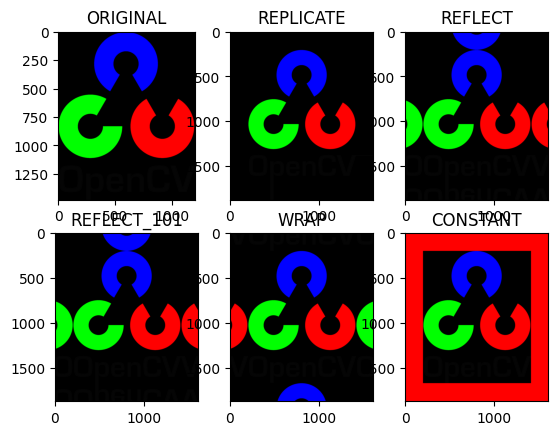

In [32]:
# Making Borders for Images (Padding)


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]
border = 200

img1 = cv.imread('opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,border,border,border,border,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()



### Arithmetic Operations on Images ###
Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.

Learn these functions: cv.add(), cv.addWeighted(), etc.

In [33]:
# Adding Images
# There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

x = np.uint8([250])
y = np.uint8([10])

print( cv.add(x,y) ) # 250+10 = 260 => 255
# [[255]]

print( x+y )          # 250+10 = 260 % 256 = 4
# [4]

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


### Image Blending
This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency.

In [35]:
img1 = cv.imread('opencv-logo.png')
img1 = cv.bitwise_not(img1)
img2 = cv.imread('img_2.png')
img2 = cv.bitwise_not(img2)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

dst1 = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

# cv.imshow('dst',dst)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(dst1)
plt.show()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:665: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
